
# World Happiness Report Visualization


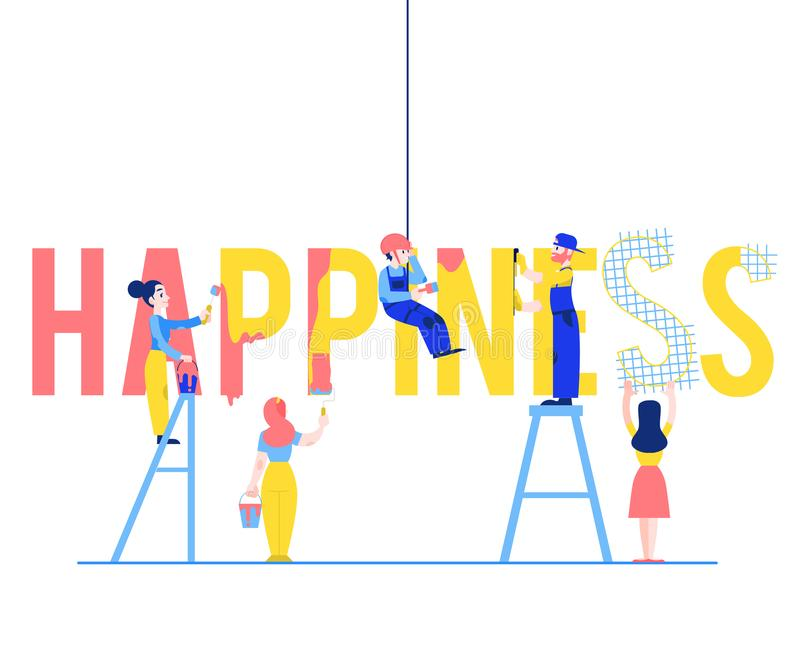

As you can see, the World Happiness Report shows us the happiness scores of the years from 2015 to 2019 and some of the features that affect this score. Happiness can be associated with many things and can affect many things. Therefore, it is very important to understand and analyze this data. By understanding and  making visualizations with these data, I wanted to both improve myself and make easier examples for those who are just at the beginning, like me.

# Importing Libraries

In [ ]:
!pip install pyecharts

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Analyze

In [ ]:
def ReadData(year):
    return pd.read_csv(f"/kaggle/input/world-happiness/{year}.csv")

In [ ]:
df2015 = ReadData(2015)
df2016 = ReadData(2016)
df2017 = ReadData(2017)
df2018 = ReadData(2018)
df2019 = ReadData(2019)

In [ ]:
datasets = (("2015", df2015), ("2016", df2016), ("2017", df2017), ("2018", df2018), ("2019", df2019))
for year,data in datasets:
    print(f"Shape of the {year} data : {data.shape}\n")

When we analyze the data, we must check the NaN values. As you can see in the below, there is only 1 NaN value in datasets. If there are several NaN values in the dataset, we can drop them. However, in datasets with a large number of NaN values, filling with a median or mean may give better results than discarding.

In [ ]:
for year,data in datasets:
    print(f"NaN values in {year} data :\n  {data.isna().sum()} \n")

In [ ]:
df2018.dropna(axis = 0, inplace = True)

# Data Merge

Now we can merge the data on Country columns to make easier to analyze. In order to see which feature belongs to which country, I will add a suffix at the end of the features that says which year it belongs to.

In [ ]:
df2015.columns = df2015.columns.map(lambda x: str(x) + '_2015')
df2016.columns = df2016.columns.map(lambda x: str(x) + '_2016')
df2017.columns = df2017.columns.map(lambda x: str(x) + '_2017')
df2018.columns = df2018.columns.map(lambda x: str(x) + '_2018')
df2019.columns = df2019.columns.map(lambda x: str(x) + '_2019')

In [ ]:
df = df2015.merge(df2016, how = "inner", left_on = "Country_2015", right_on = "Country_2016")
df = df.merge(df2017, how = "left", left_on = "Country_2015", right_on = "Country_2017")
df = df.merge(df2018, how = "left", left_on = "Country_2015", right_on = "Country or region_2018")
df = df.merge(df2019, how = "left", left_on = "Country_2015",right_on = "Country or region_2019")

In [ ]:
df.drop(['Country_2016','Region_2016','Country_2017','Country or region_2018','Country or region_2019']
        ,axis = 1, inplace = True)

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(axis = 0, inplace = True)

# Happiness Score vs Year by Country

In this section, first I created a sub-data to look at the change in happiness scores over the years. For this sub data, I concatenate the score values of the years in the table. Then I melted the dataset by years. 


In [ ]:
sub_data = pd.concat([df["Country_2015"],df["Happiness Score_2015"],df["Happiness Score_2016"],df["Happiness.Score_2017"], df["Score_2018"] ,df["Score_2019"]], axis = 1)

In [ ]:
sub_data = pd.melt(sub_data,id_vars = ["Country_2015"], value_vars = ["Happiness Score_2015","Happiness Score_2016","Happiness.Score_2017","Score_2018","Score_2019"], var_name = "Years",value_name = "Happiness Score")

Since the year column names appear as rows when I melt, I edited and replaced the column name with the year corresponding to each column name. Then I used the lineplot function in Seaborn library and made a graphic that shows us each years happiness scores by country. 

In [ ]:
sub_data["Years"][sub_data["Years"] == "Happiness Score_2015"] = 2015
sub_data["Years"][sub_data["Years"] == "Happiness Score_2016"] = 2016
sub_data["Years"][sub_data["Years"] == "Happiness.Score_2017"] = 2017
sub_data["Years"][sub_data["Years"] == "Score_2018"] = 2018
sub_data["Years"][sub_data["Years"] == "Score_2019"] = 2019

In [ ]:
plt.figure(figsize = (30,40))
sns.barplot(x = "Years",y= "Happiness Score", data = sub_data, hue = "Country_2015", palette = "viridis")
plt.xlabel("Years")
plt.ylabel("Happiness Score")
plt.title("Happiness Scores by Years")
plt.show()

# Economy vs Year by Countries

Steps are the same with happiness score visualization. Only difference is that I use lineplot in Seaborn library.

In [ ]:
df_economy = pd.concat([df["Economy (GDP per Capita)_2015"],df["Economy (GDP per Capita)_2016"],df["Economy..GDP.per.Capita._2017"],df["GDP per capita_2018"], df["GDP per capita_2019"] ,df["Country_2015"]], axis = 1)

In [ ]:
df_economy = pd.melt(df_economy,id_vars = ["Country_2015"], value_vars = ["Economy (GDP per Capita)_2015","Economy (GDP per Capita)_2016","Economy..GDP.per.Capita._2017","GDP per capita_2018","GDP per capita_2019"], var_name = "Years",value_name = "Economy(GDP per Capita)")

In [ ]:
df_economy["Years"][df_economy["Years"] == "Economy (GDP per Capita)_2015"] = 2015
df_economy["Years"][df_economy["Years"] == "Economy (GDP per Capita)_2016"] = 2016
df_economy["Years"][df_economy["Years"] == "Economy..GDP.per.Capita._2017"] = 2017
df_economy["Years"][df_economy["Years"] == "GDP per capita_2018"] = 2018
df_economy["Years"][df_economy["Years"] == "GDP per capita_2019"] = 2019

In [ ]:
plt.figure(figsize = (30,42))
sns.lineplot(x= "Years", y="Economy(GDP per Capita)",
             data= df_economy,hue="Country_2015", palette = "viridis")
plt.xlabel("Years")
plt.ylabel("Economy(GDP per Capita)")
plt.title("Mean GDP per Capita by Years")
plt.show()

# Happiness Scores Top and Bottom Countries In 2019

Here, I found the highest scoring and lowest scoring countries according to the scores of the countries and compared some fetaurs. These characteristics were health, freedom, and social support scores. The reason I looked at these was because I wanted to see if these traits affect the happiness score.

In [ ]:
sub_data = df[["Country_2015","Score_2019","Freedom to make life choices_2019","Healthy life expectancy_2019","Social support_2019"]]

While doing this, I first determined the countries I wanted by using the nlargest() and nsmallest() functions. The reason I don't use the max() and min() functions is because they only return a number as output. In these functions, we can directly see the data with the values we want.

In [ ]:
df_largest_score = sub_data.nlargest(5,"Score_2019")
df_lowest_score = sub_data.nsmallest(5,"Score_2019")

In [ ]:
df_largest_score = df_largest_score.drop(["Score_2019"], axis = 1)

In [ ]:
df_largest_score = pd.melt(df_largest_score,id_vars= ['Country_2015'] ,value_vars=["Freedom to make life choices_2019","Healthy life expectancy_2019","Social support_2019"])
df_largest_score = df_largest_score.reset_index()

In [ ]:
df_lowest_score = df_lowest_score.drop(["Score_2019"], axis = 1)

In [ ]:
df_lowest_score = pd.melt(df_lowest_score,id_vars= ['Country_2015'] ,value_vars=["Freedom to make life choices_2019","Healthy life expectancy_2019","Social support_2019"])
df_lowest_score = df_lowest_score.reset_index()

In [ ]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.ylim((0,2))
sns.barplot(x='Country_2015', y='value', hue='variable', data=df_largest_score ,palette = 'viridis')
plt.title("Countries That Have Best Scores")



plt.subplot(1,2,2)
plt.ylim((0,2))
sns.barplot(x='Country_2015', y='value', hue='variable', data= df_lowest_score,palette = 'viridis')
plt.title("Countries That Have Worst Scores")
plt.show()

# Countries With the Highest Increase and Decrease

In this part, I first wanted to look at the changes in the happiness score of countries from 2015 to 2019. So I added a feature that gives the score differences to the data by creating a for loop. After that, I got the countries with the highest increase and the highest decrease. Then I visualized it using barplot.

In [ ]:
df["Score_difference"] = 0
for i in range(len(df)):
    df["Score_difference"].iloc[i] = df["Score_2019"].iloc[i] - df["Happiness Score_2015"].iloc[i] 

In [ ]:
score_difference_top5 = df.nlargest(5,"Score_difference")
score_difference_bottom5 = df.nsmallest(5,"Score_difference")

In [ ]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
sns.barplot(x = "Country_2015", y = "Score_difference", data = score_difference_top5, palette = "viridis")
plt.ylabel("Score Difference")
plt.xlabel("Country")
plt.title("Top 5 Happiness Score Increase")

plt.subplot(1,2,2)
sns.barplot(x = "Country_2015", y = "Score_difference", data = score_difference_bottom5, palette = "viridis")
plt.ylabel("Score Difference")
plt.xlabel("Country")
plt.title("Top 5 Happiness Score Decrease")
plt.show()

# Happiness Score Difference By Countries


In [ ]:
score_data = pd.concat([df["Country_2015"],df["Happiness Score_2015"],df["Happiness Score_2016"],df["Happiness.Score_2017"], df["Score_2018"] ,df["Score_2019"]], axis = 1)
score_data["Score_difference"] = 0
for i in range(len(sub_data)):
    score_data["Score_difference"].iloc[i] = score_data["Score_2019"].iloc[i] - score_data["Happiness Score_2015"].iloc[i] 

In [ ]:
scoresGroupByCountry = score_data.groupby(["Country_2015","Score_difference"]).sum().reset_index()
country = list(scoresGroupByCountry["Country_2015"])
diff = list(scoresGroupByCountry["Score_difference"])
list1 = [[country[i],diff[i]] for i in range(scoresGroupByCountry.shape[0])] 
map_1 = Map(init_opts=opts.InitOpts(width='1000px', height='460px',theme=ThemeType.ROMANTIC)) 
map_1.add('Rank Difference', 
 list1, 
 maptype='world',
 is_map_symbol_show=False) 
map_1.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) 
map_1.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=611,is_piecewise=True,pieces=[
 {"max": -3},
 {"max": -2, "max":-1},
 {"max": -1, "max": 0},
 {"max": 0, "max": 1},
 {"max": 1, "max": 2},
 {"max": 2, "max": 3}]),
  title_opts=opts.TitleOpts(
 title='Happiness Score Difference By Countries',
 pos_left='center',
 padding=0,
 item_gap=2,
 title_textstyle_opts= opts.TextStyleOpts(color='Black',
 font_weight='bold',
 font_family='Courier New',
 font_size=30), 
 subtitle_textstyle_opts= opts.TextStyleOpts(color='grey',
 font_weight='bold',
 font_family='Courier New',
 font_size=13)), 
 legend_opts=opts.LegendOpts(is_show=False))
map_1.render_notebook()

In this part, I visualized the score difference by country using the  visualization of [Özgür Doğan's](https://www.kaggle.com/ozgurdogan646) [Forbes Top 2000 Pre-Post Pandemic Analysis ](https://www.kaggle.com/ozgurdogan646/forbes-top-2000-pre-post-pandemic-analysis).
